# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

In [ ]:
! pip install plotly_express

In [ ]:
! gdown 1OxEmlKV4o2UCJJRgXeIP41PKuPwpGR6t

Downloading...
From: https://drive.google.com/uc?id=1OxEmlKV4o2UCJJRgXeIP41PKuPwpGR6t
To: /content/output.csv
100% 3.65M/3.65M [00:00<00:00, 17.6MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as px
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random

QUESTION-1

Are there any missing values and duplicate instances in the dataset? If so, how do you plan to handle them?

In [ ]:
df=pd.read_csv('output.csv')
df.head()

,Unnamed: 0,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,0,Afghanistan,AFG,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,1,Afghanistan,AFG,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,2,Afghanistan,AFG,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,3,Afghanistan,AFG,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,4,Afghanistan,AFG,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


In [ ]:
cols=list(df.columns)
cols

['Unnamed: 0',
 'Entity',
 'Code',
 'Year',
 'Self-harm',
 'Exposure to forces of nature',
 'Conflict and terrorism',
 'Interpersonal violence',
 'Neglected tropical diseases and malaria',
 'Substance use disorders',
 'Skin and subcutaneous diseases',
 'Enteric infections',
 'Diabetes and kidney diseases',
 'Cardiovascular diseases',
 'Digestive diseases',
 'Nutritional deficiencies',
 'Respiratory infections and tuberculosis',
 'Neonatal disorders',
 'Chronic respiratory diseases',
 'Other non-communicable diseases',
 'Maternal disorders',
 'Unintentional injuries',
 'Musculoskeletal disorders',
 'Neoplasms',
 'Mental disorders',
 'Neurological disorders',
 'HIV/AIDS and sexually transmitted infections',
 'Transport injuries',
 'Sense organ diseases']

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,Afghanistan,AFG,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,0.415665,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,Afghanistan,AFG,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,0.424702,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,Afghanistan,AFG,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,0.438182,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,Afghanistan,AFG,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,0.434898,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,Afghanistan,AFG,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,0.420710,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


In [ ]:
df.describe()

,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,Enteric infections,Diabetes and kidney diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
count,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,...,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000,8010.000000
mean,2004.500000,1.474314,0.114057,0.492335,1.302838,2.608271,1.320031,1.615395,3.956714,4.240458,...,6.227981,0.490129,4.578895,5.067318,9.598367,4.793094,3.568574,3.420211,3.169470,1.860369
std,8.655982,1.111946,1.223887,2.436454,1.675635,4.650597,1.043225,0.697138,4.779579,2.997696,...,1.919379,0.492066,2.082028,3.167880,6.157686,2.252644,1.724698,7.041390,1.912294,0.792618
min,1990.000000,0.071499,0.000000,0.000000,0.060105,0.006230,0.044738,0.077602,0.132819,0.186572,...,0.581227,0.009605,0.314154,0.094548,0.362740,0.215647,0.119888,0.033602,0.359275,0.065492
25%,1997.000000,0.634519,0.000843,0.001815,0.459803,0.126486,0.477419,1.046046,0.501588,2.182802,...,5.038594,0.062786,3.272051,2.341082,4.114488,3.011310,2.071630,0.278006,1.982297,1.215651
50%,2004.500000,1.283574,0.008351,0.019862,0.749740,0.467261,1.087049,1.611648,1.460791,3.574745,...,5.937563,0.298159,4.530466,4.775494,8.310473,4.653194,3.606597,0.904092,2.859331,1.969609
75%,2012.000000,2.017677,0.038188,0.190665,1.398656,2.119217,1.826260,2.146483,6.134738,5.278986,...,6.899145,0.838322,5.614134,7.135211,15.085827,6.391232,4.786599,2.915708,3.743558,2.406374
max,2019.000000,11.794995,69.702674,81.933481,19.686195,28.985044,6.662409,3.971210,23.826935,22.497118,...,16.210265,2.827453,71.446863,14.506278,31.664095,13.761517,8.685364,56.152370,20.809193,4.305714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        8010 non-null   object 
 1   Code                                          6150 non-null   object 
 2   Year                                          8010 non-null   int64  
 3   Self-harm                                     8010 non-null   float64
 4   Exposure to forces of nature                  8010 non-null   float64
 5   Conflict and terrorism                        8010 non-null   float64
 6   Interpersonal violence                        8010 non-null   float64
 7   Neglected tropical diseases and malaria       8010 non-null   float64
 8   Substance use disorders                       8010 non-null   float64
 9   Skin and subcutaneous diseases                8010 non-null   f

In [ ]:
df.isna().sum()

Entity                                             0
Code                                            1860
Year                                               0
Self-harm                                          0
Exposure to forces of nature                       0
Conflict and terrorism                             0
Interpersonal violence                             0
Neglected tropical diseases and malaria            0
Substance use disorders                            0
Skin and subcutaneous diseases                     0
Enteric infections                                 0
Diabetes and kidney diseases                       0
Cardiovascular diseases                            0
Digestive diseases                                 0
Nutritional deficiencies                           0
Respiratory infections and tuberculosis            0
Neonatal disorders                                 0
Chronic respiratory diseases                       0
Other non-communicable diseases               

In [ ]:
countryCode={}

In [ ]:
NoCodeCountry=list(df[df['Code'].isna()]['Entity'].unique())
NoCodeCountry

['Africa',
 'African Region',
 'African Union',
 'America',
 'Andean Latin America',
 'Asia',
 'Australasia',
 'Caribbean',
 'Central Asia',
 'Central Europe',
 'Central Europe, Eastern Europe, and Central Asia',
 'Central Latin America',
 'Central sub-Saharan Africa',
 'Commonwealth',
 'Commonwealth High Income',
 'Commonwealth Low Income',
 'Commonwealth Middle Income',
 'East Asia',
 'East Asia & Pacific - World Bank region',
 'Eastern Europe',
 'Eastern Mediterranean Region',
 'Eastern sub-Saharan Africa',
 'England',
 'Europe',
 'Europe & Central Asia - World Bank region',
 'European Region',
 'European Union',
 'G20',
 'High SDI',
 'High-income',
 'High-income Asia Pacific',
 'High-income North America',
 'High-middle SDI',
 'Latin America & Caribbean - World Bank region',
 'Low SDI',
 'Low-middle SDI',
 'Middle East & North Africa',
 'Middle SDI',
 'Nordic Region',
 'North Africa and Middle East',
 'North America',
 'Northern Ireland',
 'OECD Countries',
 'Oceania',
 'Region of 

Storing those regions that have their 'Code' missing

In [ ]:
NoCODE=list(df[df['Code'].isna()]['Entity'].value_counts())
NoCODE

[30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30]

In [ ]:
for index in range(len(NoCodeCountry)):
    countryCode[NoCodeCountry[index]]=index+1
countryCode

{'Africa': 1,
 'African Region': 2,
 'African Union': 3,
 'America': 4,
 'Andean Latin America': 5,
 'Asia': 6,
 'Australasia': 7,
 'Caribbean': 8,
 'Central Asia': 9,
 'Central Europe': 10,
 'Central Europe, Eastern Europe, and Central Asia': 11,
 'Central Latin America': 12,
 'Central sub-Saharan Africa': 13,
 'Commonwealth': 14,
 'Commonwealth High Income': 15,
 'Commonwealth Low Income': 16,
 'Commonwealth Middle Income': 17,
 'East Asia': 18,
 'East Asia & Pacific - World Bank region': 19,
 'Eastern Europe': 20,
 'Eastern Mediterranean Region': 21,
 'Eastern sub-Saharan Africa': 22,
 'England': 23,
 'Europe': 24,
 'Europe & Central Asia - World Bank region': 25,
 'European Region': 26,
 'European Union': 27,
 'G20': 28,
 'High SDI': 29,
 'High-income': 30,
 'High-income Asia Pacific': 31,
 'High-income North America': 32,
 'High-middle SDI': 33,
 'Latin America & Caribbean - World Bank region': 34,
 'Low SDI': 35,
 'Low-middle SDI': 36,
 'Middle East & North Africa': 37,
 'Middle 

In [ ]:
len(NoCODE)

62

In [ ]:
30*62

1860

In [ ]:
df['Code'].isna().sum()

1860

In [ ]:
df['Code'].fillna("Unknown", inplace=True)

After reading the dataset, I can see that the continents don't have their Code, so I am filling the Code value with 'Continent{i}'  

In [ ]:
for i in range(len(df['Code'])):
    if df['Code'][i] == 'Unknown':
        df.loc[i, 'Code'] = "Continent" + str(countryCode[df['Entity'][i]])
        print(df['Entity'][i], df['Code'][i])

Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
Africa Continent1
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Continent2
African Region Con

So finally we have removed all the NULL values from our dataset

#### Important

We could have done two things,

i) We could have removed the Code column from dataset

ii) We can use fill the missing values of Code column in case it become useful to us

In [ ]:
df.isna().sum()

Entity                                          0
Code                                            0
Year                                            0
Self-harm                                       0
Exposure to forces of nature                    0
Conflict and terrorism                          0
Interpersonal violence                          0
Neglected tropical diseases and malaria         0
Substance use disorders                         0
Skin and subcutaneous diseases                  0
Enteric infections                              0
Diabetes and kidney diseases                    0
Cardiovascular diseases                         0
Digestive diseases                              0
Nutritional deficiencies                        0
Respiratory infections and tuberculosis         0
Neonatal disorders                              0
Chronic respiratory diseases                    0
Other non-communicable diseases                 0
Maternal disorders                              0


Summarizing your analysis and observation

## Question-2
What is the distribution of the disease burden (DALYs) across different sub-categories of disease or injury?

In [ ]:
df_africa=df[df['Entity']=="Africa"]
df_africa.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
30,Africa,Continent1,1990,0.381729,0.005109,1.075807,0.578476,10.371739,0.212380,0.563502,...,5.394891,0.947128,2.379531,0.969059,1.880788,1.607560,1.053245,3.935130,2.184354,0.622787
31,Africa,Continent1,1991,0.384668,0.007894,0.592475,0.601103,10.412613,0.217012,0.571995,...,5.363437,0.936943,2.355760,0.985774,1.896366,1.630805,1.065332,4.735044,2.170074,0.631358
32,Africa,Continent1,1992,0.393983,0.007817,0.252363,0.665331,10.371226,0.221809,0.580353,...,5.352357,0.935014,2.352056,1.002803,1.922966,1.654172,1.080140,5.627826,2.181134,0.639884
33,Africa,Continent1,1993,0.391598,0.003364,0.322918,0.689509,10.369926,0.224386,0.585785,...,5.301772,0.922667,2.316696,1.014580,1.922330,1.670059,1.088650,6.562383,2.150912,0.645273
34,Africa,Continent1,1994,0.374197,0.019193,5.582555,0.595436,9.768290,0.215074,0.558945,...,4.951230,0.865197,2.177995,0.970382,1.825383,1.594533,1.037247,7.110133,2.016111,0.614616


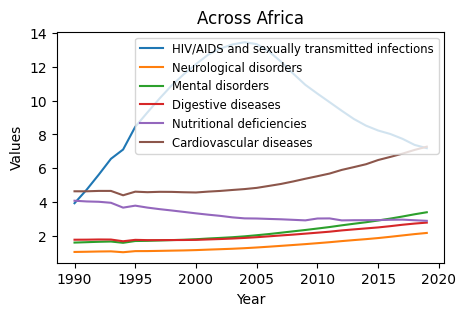

In [ ]:
columns_to_plot = ['HIV/AIDS and sexually transmitted infections','Neurological disorders', 'Mental disorders','Digestive diseases','Nutritional deficiencies','Cardiovascular diseases']  # Exclude the non-numeric columns 'Entity', 'Code', and 'Year'
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(5, 3))

# Loop through each column and plot it against the 'Year' column
for column in columns_to_plot:
    ax.plot(df_africa['Year'], df_africa[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Values')

# Set the title
ax.set_title('Across Africa')

# Add a legend
ax.legend(loc='upper right', fontsize='small')

# Display the plot
plt.show()

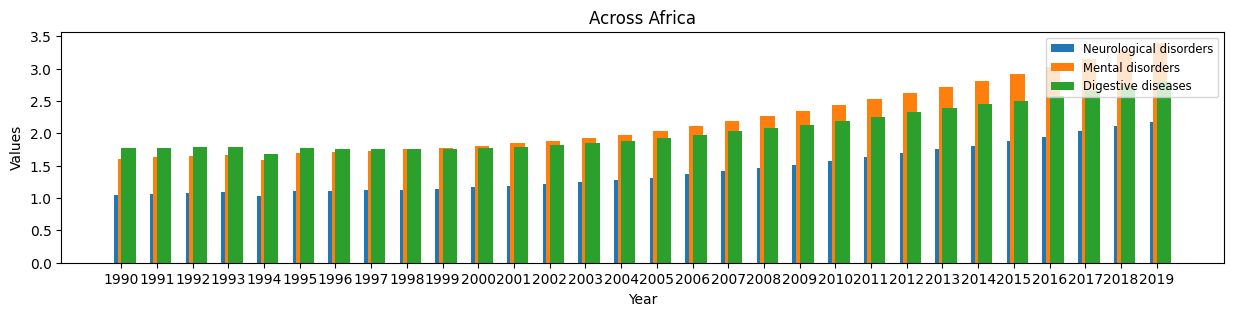

In [ ]:
columns_to_plot = ['Neurological disorders', 'Mental disorders','Digestive diseases']
fig, ax = plt.subplots(figsize=(15, 3))
bar_width = 0.4
num_categories = len(columns_to_plot)
category_spacing = bar_width / (num_categories + 1)

for i, column in enumerate(columns_to_plot):
    x = np.arange(len(df_africa['Year'])) + (i * category_spacing)
    ax.bar(x, df_africa[column], width=bar_width, label=column)

ax.set_xticks(np.arange(len(df_africa['Year'])))
ax.set_xticklabels(df_africa['Year'])

ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Across Africa')

ax.legend(loc='upper right', fontsize='small')

plt.show()

In [ ]:
cols=df.columns
cols=cols[3:]
cols

Index(['Self-harm', 'Exposure to forces of nature', 'Conflict and terrorism',
       'Interpersonal violence', 'Neglected tropical diseases and malaria',
       'Substance use disorders', 'Skin and subcutaneous diseases',
       'Enteric infections', 'Diabetes and kidney diseases',
       'Cardiovascular diseases', 'Digestive diseases',
       'Nutritional deficiencies', 'Respiratory infections and tuberculosis',
       'Neonatal disorders', 'Chronic respiratory diseases',
       'Other non-communicable diseases', 'Maternal disorders',
       'Unintentional injuries', 'Musculoskeletal disorders', 'Neoplasms',
       'Mental disorders', 'Neurological disorders',
       'HIV/AIDS and sexually transmitted infections', 'Transport injuries',
       'Sense organ diseases'],
      dtype='object')

In [ ]:
averaged_map_africa={}
for col in cols:
    averaged_map_africa[col]=df_africa[col].mean()
averaged_map_africa

{'Self-harm': 0.4687602634812584,
 'Exposure to forces of nature': 0.014183111926407987,
 'Conflict and terrorism': 0.6926648177651695,
 'Interpersonal violence': 0.7318204483601053,
 'Neglected tropical diseases and malaria': 10.26494208772693,
 'Substance use disorders': 0.29067276504108996,
 'Skin and subcutaneous diseases': 0.7611322994577188,
 'Enteric infections': 11.486703376586926,
 'Diabetes and kidney diseases': 1.5514685331364484,
 'Cardiovascular diseases': 5.289230491564129,
 'Digestive diseases': 2.057889923378428,
 'Nutritional deficiencies': 3.2698848689565247,
 'Respiratory infections and tuberculosis': 12.989923332375238,
 'Neonatal disorders': 12.128368911941418,
 'Chronic respiratory diseases': 1.2581321564455916,
 'Other non-communicable diseases': 5.693583229297194,
 'Maternal disorders': 0.9829747916114686,
 'Unintentional injuries': 2.3143567727313763,
 'Musculoskeletal disorders': 1.3965673995166379,
 'Neoplasms': 2.4173649009992597,
 'Mental disorders': 2.2043

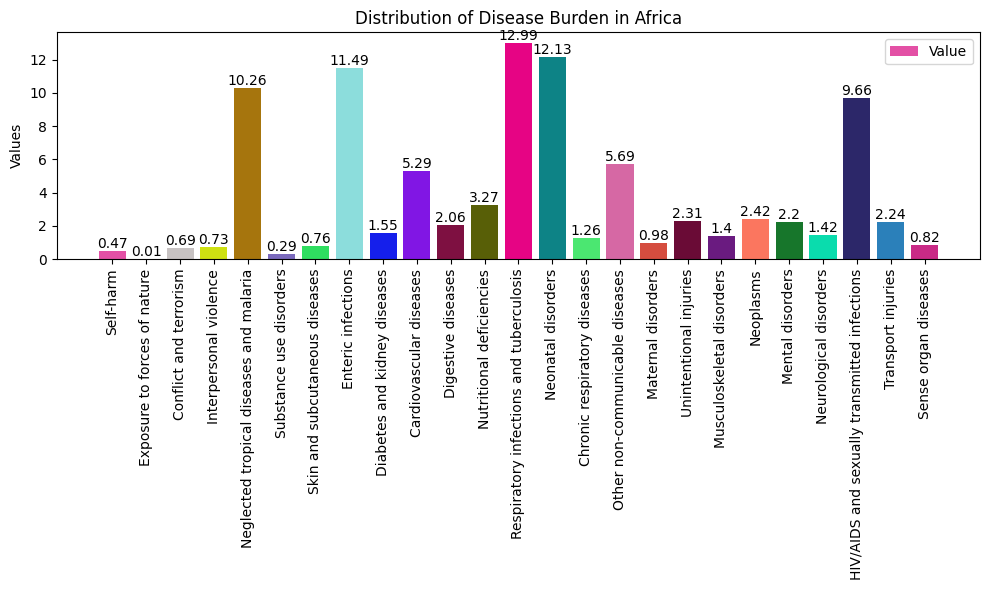

In [ ]:
categories = list(averaged_map_africa.keys())
values = list(averaged_map_africa.values())

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(np.arange(len(categories)), values, color=np.random.rand(len(categories), 3))

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
            ha='center', va='bottom')

ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation=90)

ax.set_ylabel('Values')
ax.set_title('Distribution of Disease Burden in Africa')
ax.legend(['Value'])

plt.tight_layout()
plt.show()

Summarizing your analysis and observations

### Question-3
How does the disease burden vary across different countries or regions and years? Are there any significant trends or patterns?

In [ ]:
countries = df['Entity'].unique()
countries

array(['Afghanistan', 'Africa', 'African Region', 'African Union',
       'Albania', 'Algeria', 'America', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australasia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Commonwealth',
       'Commonwealth High Income', 'Commonwealth Low Income',
       'Commonwealth Middle Income', 'Comoros', 'Congo', 'Cook Islands',
       '

In [ ]:
continents=["Africa", "America", "Asia", "Europe", "Australasia"]
continents

['Africa', 'America', 'Asia', 'Europe', 'Australasia']

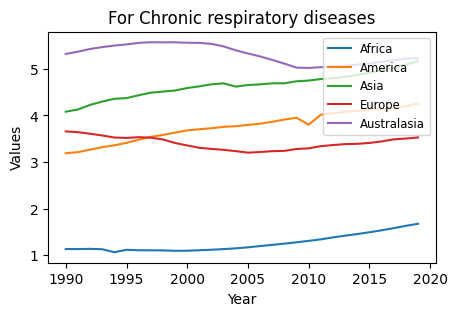

In [ ]:
columns_to_plot = ['Chronic respiratory diseases']
fig, ax = plt.subplots(figsize=(5, 3))
for continent in continents:
    df_continent=df[df['Entity']==continent]
    df_continent.head()
    ax.plot(df_continent['Year'], df_continent['Chronic respiratory diseases'], label=continent)
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('For Chronic respiratory diseases')
ax.legend(loc='upper right', fontsize='small')
plt.show()

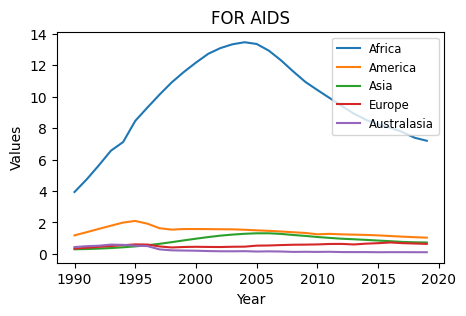

In [ ]:
columns_to_plot = 'HIV/AIDS and sexually transmitted infections','Neurological disorders'
fig, ax = plt.subplots(figsize=(5, 3))
for continent in continents:
    df_continent=df[df['Entity']==continent]
    df_continent.head()
    ax.plot(df_continent['Year'], df_continent['HIV/AIDS and sexually transmitted infections'], label=continent)
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('FOR AIDS')
ax.legend(loc='upper right', fontsize='small')
plt.show()

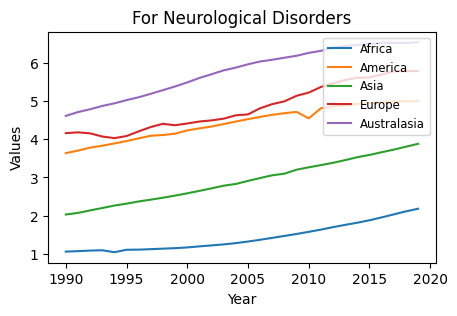

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
for continent in continents:
    df_continent=df[df['Entity']==continent]
    df_continent.head()
    ax.plot(df_continent['Year'], df_continent['Neurological disorders'], label=continent)
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('For Neurological Disorders')
ax.legend(loc='upper right', fontsize='small')
plt.show()

In [ ]:
fig = px.choropleth(df,locations='Code',color='HIV/AIDS and sexually transmitted infections',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(10,50),title='HIV/AIDS Across the World',height=700,animation_frame ='Year')
fig.show()

In [ ]:
fig = px.choropleth(df,locations='Code',color='Cardiovascular diseases',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(10,50),title='Cardiovascular diseases',height=700,animation_frame ='Year')
fig.show()

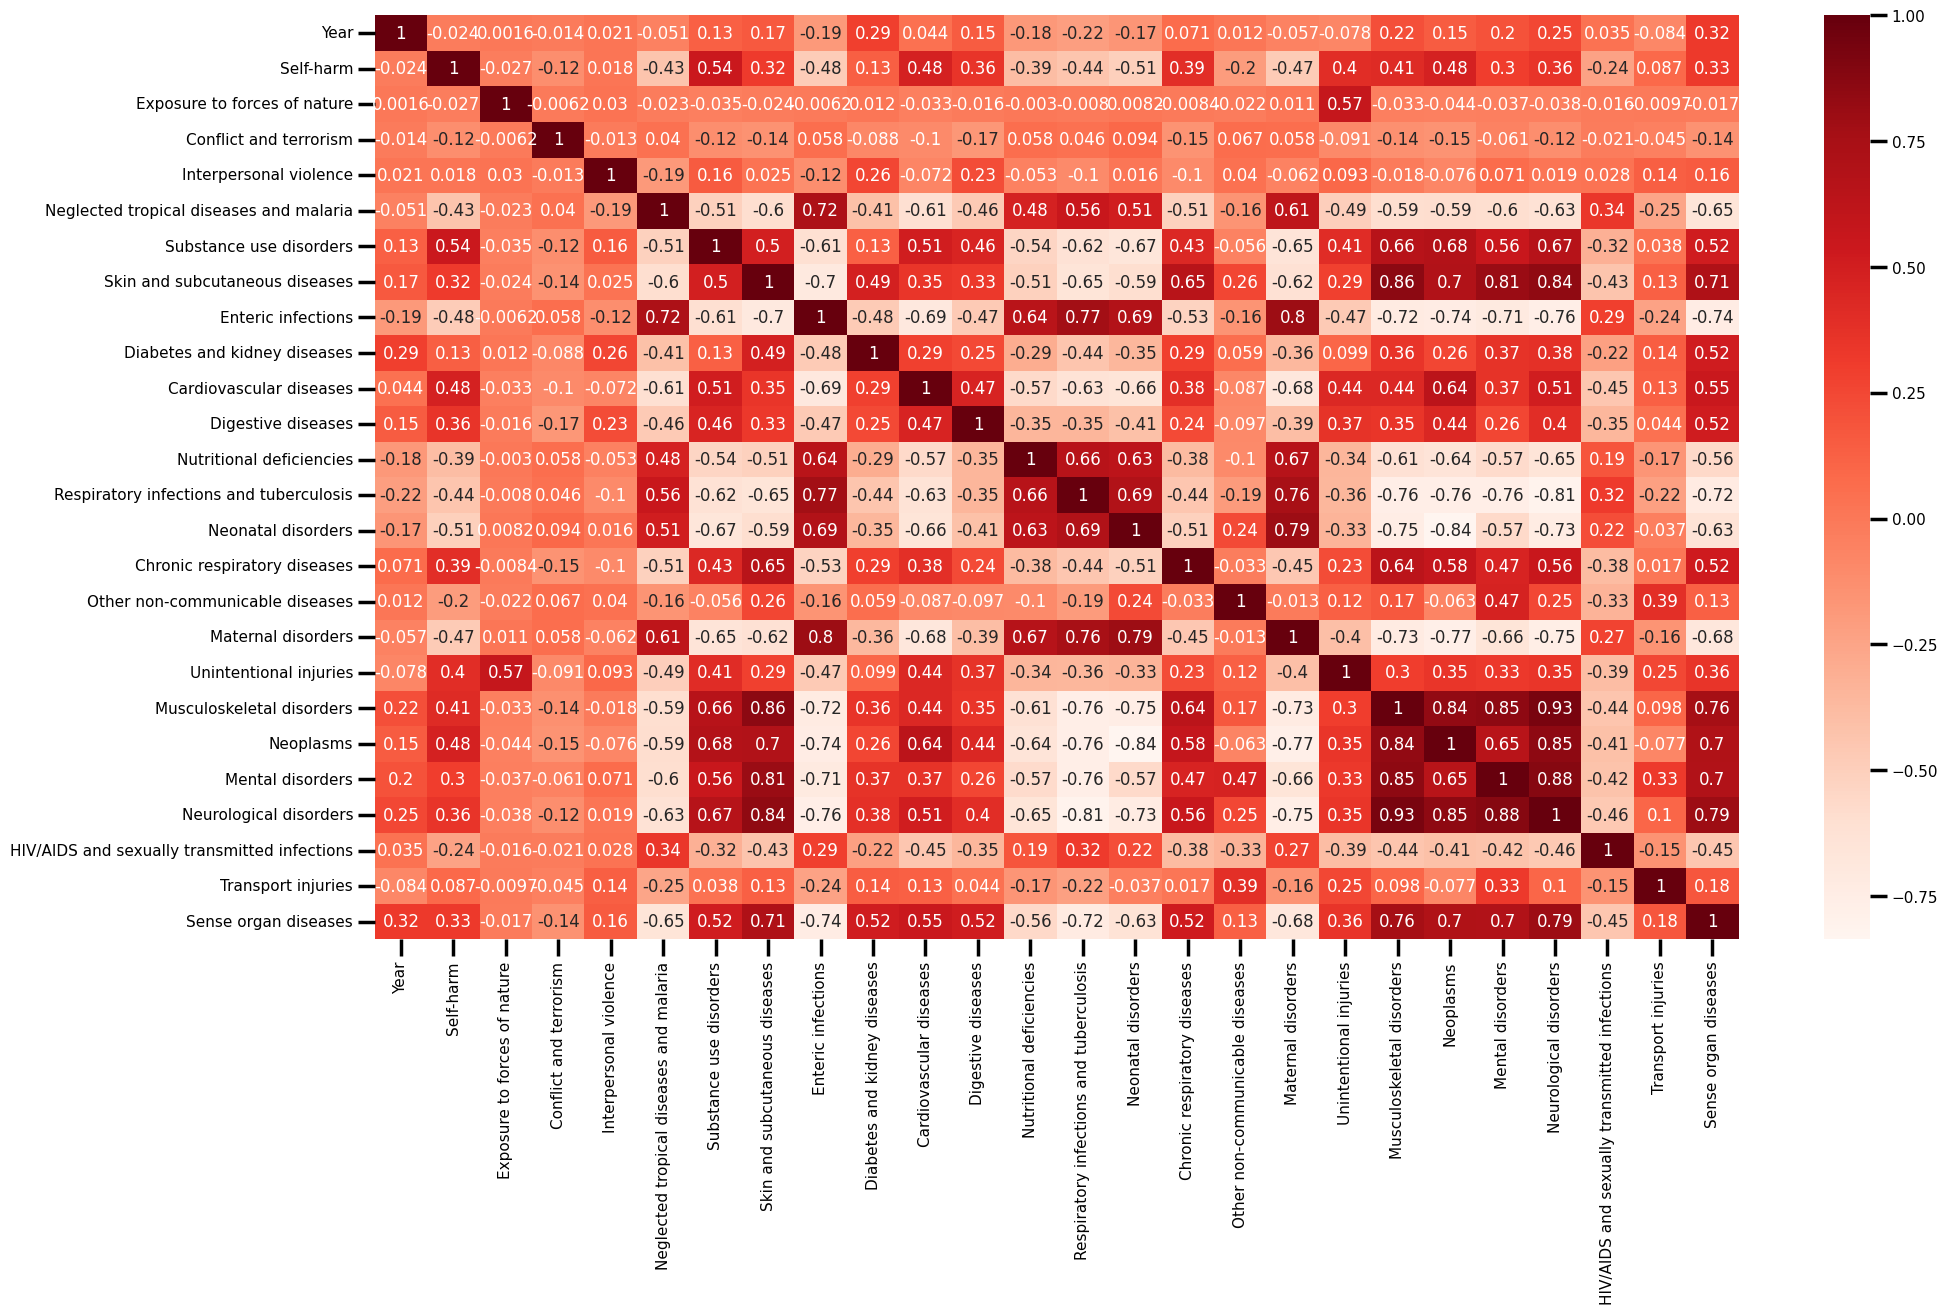

In [ ]:
dff=df.drop(['Entity','Code'],axis=1)
sn.set_context('poster', font_scale=0.5)
plt.figure(figsize=(22,12))
cor = dff.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Summarizing your analysis and observation

## Question-4
Can we identify any outliers or extreme values in the disease burden data? How do they impact the overall analysis? Perform the required visualization task.

#### Cardiovascular Diseases - AFRICA

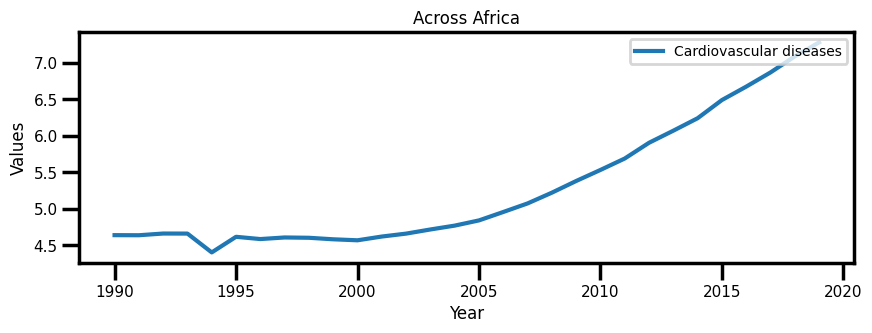

In [ ]:
columns_to_plot = ['Cardiovascular diseases']  # Exclude the non-numeric columns 'Entity', 'Code', and 'Year'
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 3))

# Loop through each column and plot it against the 'Year' column
for column in columns_to_plot:
    ax.plot(df_africa['Year'], df_africa[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Values')

# Set the title
ax.set_title('Across Africa')

# Add a legend
ax.legend(loc='upper right', fontsize='small')

# Display the plot
plt.show()

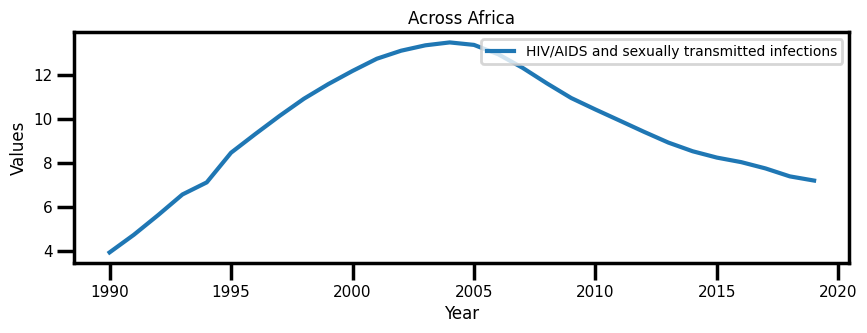

In [ ]:
columns_to_plot = ['HIV/AIDS and sexually transmitted infections']  # Exclude the non-numeric columns 'Entity', 'Code', and 'Year'
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 3))

# Loop through each column and plot it against the 'Year' column
for column in columns_to_plot:
    ax.plot(df_africa['Year'], df_africa[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Values')

# Set the title
ax.set_title('Across Africa')

# Add a legend
ax.legend(loc='upper right', fontsize='small')

# Display the plot
plt.show()

In [ ]:
df_Australia=df[df["Entity"]=="Australia"]
df_Australia.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
480,Australia,AUS,1990,2.460946,0.017359,0.002682,0.728814,0.031385,2.514496,2.316100,...,6.695784,0.050897,6.265795,8.457299,16.018181,8.738003,4.652626,0.467245,3.843433,2.125189
481,Australia,AUS,1991,2.483632,0.015282,0.005148,0.710698,0.031245,2.672929,2.352451,...,6.399446,0.043000,6.313902,8.669921,16.218548,8.869804,4.755448,0.525595,3.538368,2.167072
482,Australia,AUS,1992,2.488214,0.011010,0.002716,0.671791,0.030735,2.817300,2.363474,...,6.169752,0.043392,6.279612,8.789135,16.407338,8.898856,4.829105,0.564204,3.352638,2.182848
483,Australia,AUS,1993,2.466621,0.003813,0.000320,0.682427,0.030508,2.959602,2.392173,...,5.939969,0.048547,6.293789,8.960312,16.570502,8.983886,4.920816,0.656891,3.181762,2.212675
484,Australia,AUS,1994,2.533147,0.001740,0.007412,0.683149,0.029879,3.082443,2.393495,...,5.761440,0.052254,6.320619,9.026725,16.741312,8.960409,4.977514,0.634606,3.075775,2.216873


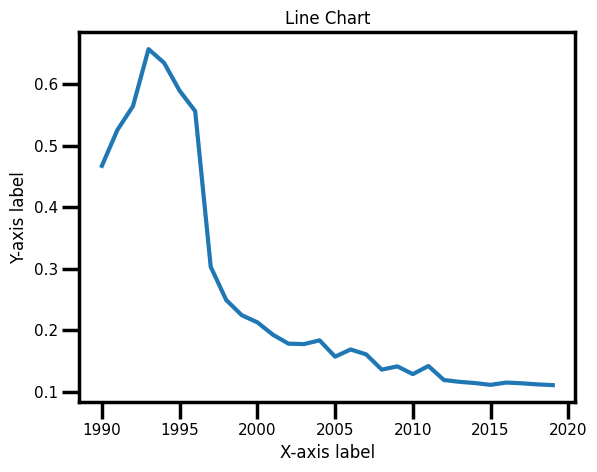

In [ ]:
plt.plot(df_Australia['Year'], df_Australia['HIV/AIDS and sexually transmitted infections'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Line Chart')
plt.show()

Like here we can sudden increase in the year 1995 could be an anomaly

In [ ]:
# plt.plot(df_Australia['Year'], df_Australia['Cardiovascular diseases'])
# plt.xlabel('X-axis label')
# plt.ylabel('Y-axis label')
# plt.title('Line Chart')
# plt.show()

In [ ]:
# df_asia = df[df['Entity'] == "Asia"]
# plt.plot(df_asia['Year'], df_asia['HIV/AIDS and sexually transmitted infections'])
# plt.xlabel('Year')
# plt.ylabel('HIV/AIDS and sexually transmitted infections')
# plt.title('Line Chart')

# # Display the chart
# plt.legend(countries)
# plt.show()

In [ ]:
df_asia=df[df['Entity']=="Asia"]
df_asia.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
420,Asia,Continent6,1990,1.637704,0.210742,0.178598,0.678325,2.265781,0.718480,1.236207,...,5.902620,0.853075,5.362089,3.058577,5.822975,2.947702,2.026886,0.294659,2.879061,1.505681
421,Asia,Continent6,1991,1.654791,0.671239,0.179284,0.671282,2.238768,0.749254,1.253233,...,5.855186,0.836710,5.775405,3.094644,5.927212,3.021469,2.067611,0.309640,2.887234,1.536755
422,Asia,Continent6,1992,1.684584,0.053552,0.182394,0.689413,2.164798,0.783663,1.284061,...,5.871267,0.845211,5.141901,3.168405,6.096896,3.129501,2.133989,0.335864,2.928176,1.587455
423,Asia,Continent6,1993,1.697177,0.090833,0.199808,0.700736,2.087941,0.813896,1.312967,...,5.880537,0.828607,5.178893,3.244620,6.272957,3.230769,2.196608,0.372390,2.974036,1.637717
424,Asia,Continent6,1994,1.749455,0.049457,0.162279,0.720060,1.978805,0.848080,1.342001,...,5.894875,0.826457,5.130861,3.333105,6.461106,3.328644,2.261428,0.419832,3.045916,1.690037


In [ ]:
# columns_to_plot = ['HIV/AIDS and sexually transmitted infections','Neurological disorders', 'Mental disorders']  # Exclude the non-numeric columns 'Entity', 'Code', and 'Year'
# columns_mapped={}
# columns_mapped['HIV/AIDS and sexually transmitted infections']='AIDS'
# columns_mapped['Neurological disorders']='Alzheimer'
# columns_mapped['Mental disorders']='Schizophrenia'
# # Create a figure and axis for plotting
# fig, ax = plt.subplots(figsize=(5, 3))

# # Loop through each column and plot it against the 'Year' column
# for column in columns_to_plot:
#     ax.plot(df_asia['Year'], df_asia[column], label=columns_mapped[column])

# # Set the x-axis label
# ax.set_xlabel('Year')

# # Set the y-axis label
# ax.set_ylabel('Values')

# # Set the title
# ax.set_title('Across ASIA')

# # Add a legend
# ax.legend(loc='upper right', fontsize='small')

# # Display the plot
# plt.show()

In [ ]:
df_europe=df[df['Entity']=="Europe"]
df_europe.head()

,Entity,Code,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
2520,Europe,Continent24,1990,2.240144,0.013639,0.041532,1.026917,0.103265,2.130554,1.639428,...,6.315131,0.100261,6.034286,5.960186,14.835787,5.105195,4.160535,0.335165,3.743638,1.968808
2521,Europe,Continent24,1991,2.304309,0.013822,0.133314,1.089687,0.103013,2.232968,1.633269,...,6.174827,0.095298,6.055866,5.977900,14.907965,5.092707,4.181550,0.393664,3.711282,1.972452
2522,Europe,Continent24,1992,2.415722,0.028192,0.333984,1.278416,0.101182,2.353160,1.610914,...,5.972721,0.088360,6.117423,5.936424,14.914389,5.029234,4.156162,0.447299,3.623185,1.954838
2523,Europe,Continent24,1993,2.589736,0.016801,0.253459,1.478856,0.097756,2.468186,1.563126,...,5.713833,0.082400,6.206643,5.798575,14.922828,4.885790,4.072403,0.500210,3.515584,1.904167
2524,Europe,Continent24,1994,2.709505,0.012900,0.218512,1.577278,0.094971,2.560873,1.534128,...,5.549486,0.079448,6.294171,5.729363,14.859730,4.803331,4.029720,0.554376,3.431344,1.878025


In [ ]:
# columns_to_plot = ['HIV/AIDS and sexually transmitted infections','Neurological disorders', 'Mental disorders']  # Exclude the non-numeric columns 'Entity', 'Code', and 'Year'
# columns_mapped={}
# columns_mapped['HIV/AIDS and sexually transmitted infections']='AIDS'
# columns_mapped['Neurological disorders']='Alzheimer'
# columns_mapped['Mental disorders']='Schizophrenia'
# # Create a figure and axis for plotting
# fig, ax = plt.subplots(figsize=(5, 3))

# # Loop through each column and plot it against the 'Year' column
# for column in columns_to_plot:
#     ax.plot(df_europe['Year'], df_europe[column], label=columns_mapped[column])

# # Set the x-axis label
# ax.set_xlabel('Year')

# # Set the y-axis label
# ax.set_ylabel('Values')

# # Set the title
# ax.set_title('Across EUROPE')

# # Add a legend
# ax.legend(loc='upper right', fontsize='small')

# # Display the plot
# plt.show()

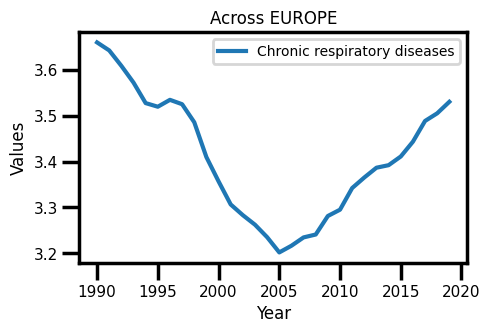

In [ ]:
columns_to_plot = ['Chronic respiratory diseases']
fig, ax = plt.subplots(figsize=(5, 3))
for column in columns_to_plot:
    ax.plot(df_europe['Year'], df_europe[column], label="Chronic respiratory diseases")
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Across EUROPE')
ax.legend(loc='upper right', fontsize='small')
plt.show()

Here also we can see that in year 2005 there is a sudden drop, there this could be an anomaly.

Summarizing your analysis and observations

# **TASK 2** - Classification/Regression

## Question-5
Perform preprocessing and normalization on the data? How data normalization will help you in model training and prediction.

In [ ]:
df=df.drop(['Code'],axis=1)
df.head()

,Entity,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,Enteric infections,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,Afghanistan,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,0.415665,3.458800,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,Afghanistan,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,0.424702,3.739355,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,Afghanistan,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,0.438182,4.172208,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,Afghanistan,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,0.434898,4.969801,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,Afghanistan,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,0.420710,4.646844,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


Importing the Label Encode so that we can convert Entity column of class:String to class:Int

In [ ]:
le=LabelEncoder()

In [ ]:
df['Entity']=le.fit_transform(df['Entity'])
df.head()

,Entity,Year,Self-harm,Exposure to forces of nature,Conflict and terrorism,Interpersonal violence,Neglected tropical diseases and malaria,Substance use disorders,Skin and subcutaneous diseases,Enteric infections,...,Other non-communicable diseases,Maternal disorders,Unintentional injuries,Musculoskeletal disorders,Neoplasms,Mental disorders,Neurological disorders,HIV/AIDS and sexually transmitted infections,Transport injuries,Sense organ diseases
0,0,1990,0.305874,0.007185,3.688980,0.829299,1.118338,0.187690,0.415665,3.458800,...,11.937438,1.347937,3.807512,0.937570,3.269981,1.696670,1.283453,0.121302,2.375831,0.646459
1,0,1991,0.312853,0.662918,4.598062,1.007482,1.136197,0.193772,0.424702,3.739355,...,11.866293,1.376094,4.350370,0.921341,3.130858,1.734281,1.269533,0.123435,2.353230,0.626081
2,0,1992,0.328217,0.293873,4.939704,1.057353,1.100388,0.204869,0.438182,4.172208,...,12.268632,1.436542,3.941653,0.900800,2.977764,1.791189,1.268217,0.146242,2.420953,0.598476
3,0,1993,0.332590,0.114703,4.546126,1.085709,0.964654,0.206346,0.434898,4.969801,...,12.497789,1.448949,3.797663,0.865468,2.837313,1.776779,1.244622,0.170525,2.484723,0.566259
4,0,1994,0.324567,0.084153,6.225331,1.103499,0.922281,0.200465,0.420710,4.646844,...,12.183113,1.410758,3.711383,0.823579,2.699818,1.712986,1.198240,0.171896,2.407289,0.535983


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        8010 non-null   int64  
 1   Year                                          8010 non-null   int64  
 2   Self-harm                                     8010 non-null   float64
 3   Exposure to forces of nature                  8010 non-null   float64
 4   Conflict and terrorism                        8010 non-null   float64
 5   Interpersonal violence                        8010 non-null   float64
 6   Neglected tropical diseases and malaria       8010 non-null   float64
 7   Substance use disorders                       8010 non-null   float64
 8   Skin and subcutaneous diseases                8010 non-null   float64
 9   Enteric infections                            8010 non-null   f

In [ ]:
X=df.drop(['Mental disorders'],axis=1)
y=df['Mental disorders']

In [ ]:
sc=StandardScaler()

Normalization

In [ ]:
df=sc.fit_transform(df)

In [ ]:
df

array([[-1.72557583, -1.67524673, -1.05087216, ..., -0.46853178,
        -0.41504508, -1.53161543],
       [-1.72557583, -1.55971247, -1.04459543, ..., -0.46822876,
        -0.42686471, -1.55732613],
       [-1.72557583, -1.44417822, -1.03077709, ..., -0.46498967,
        -0.39144781, -1.59215597],
       ...,
       [ 1.72557583,  1.44417822,  0.0033884 , ...,  2.32149624,
        -0.52792042, -1.01661782],
       [ 1.72557583,  1.55971247,  0.05879102, ...,  2.07831893,
        -0.47413405, -0.95448474],
       [ 1.72557583,  1.67524673,  0.08497669, ...,  1.92276442,
        -0.49121554, -0.92090631]])

Splitting of dataset into 80:20 ratio

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.9153637346329239


In [ ]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_pred=DTR.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.981766595091578


In [ ]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred=RFR.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.9943707298564589


We are calculating the r2-score using LinearRegression, DecisionTree Regressor and RandomForest Regressor

r2-score is a value between 0 and 1

The greater the r2-score, the more the efficiency of the model

Summarizing your analysis and observation

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices

